In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing et standardisation
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Feature Engineering
import re
from collections import Counter

# Séparation du jeu de données
from sklearn.model_selection import train_test_split


# Importation pour notre modélisation
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Importation bibliothèque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import shap
import warnings
warnings.filterwarnings('ignore')


# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold


# Séparation du jeu de données
from sklearn.model_selection import train_test_split

# Modélisation
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

# Mesures de performances
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

# Tests avec un régulateur pour la Régression Linéaire
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Optimisation du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV




C:\Users\gregm\anaconda3\envs\Python\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('df_modélisation.csv')

df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
# Imputation des variables

df.replace([np.inf, -np.inf], np.nan, inplace=True)
col_num = list(df.select_dtypes('float64').columns)

imp_mean = SimpleImputer(strategy='mean') # Création de l'objet SimpleImputer et définition de la stratégie de l'imputation
df[col_num] = imp_mean.fit_transform(df[col_num]) # Imputation des données manquantes dans les colonnes numériques

In [5]:
# Création du train_test_split

# Séparation des données de la cible
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Division en train et validation (75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

display('Données entrainements : ',X_train.shape, X_test.shape)
display('Données de validation',y_train.shape, y_test.shape)

'Données entrainements : '

(230629, 162)

(76877, 162)

'Données de validation'

(230629,)

(76877,)

## Modélisation

In [6]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print('Le taux de prédiction du modèle est de : ',model.score(X_train, y_train))

Le taux de prédiction du modèle est de :  0.9209249487271766


In [7]:
# on va faire une prédiction
prediction = model.predict(X_test)
print ('La performance du modèle sur X test est : ', model.score(X_test, y_test))

La performance du modèle sur X test est :  0.9143827152464327


In [8]:
# Classification

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     70762
           1       0.12      0.01      0.02      6115

    accuracy                           0.91     76877
   macro avg       0.52      0.50      0.49     76877
weighted avg       0.86      0.91      0.88     76877



In [9]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model.predict(X_test))

array([[70218,   544],
       [ 6038,    77]], dtype=int64)

In [10]:
import pickle

# Sauvegarde du modèle
with open('model_KNN.pkl', 'wb') as file:
    pickle.dump(model, file)

## Optimisation

In [11]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 10, scoring = 'accuracy').mean()

0.9132502840787599

In [12]:
score_validation = []
for k in range(1,26):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    score_validation.append(score)

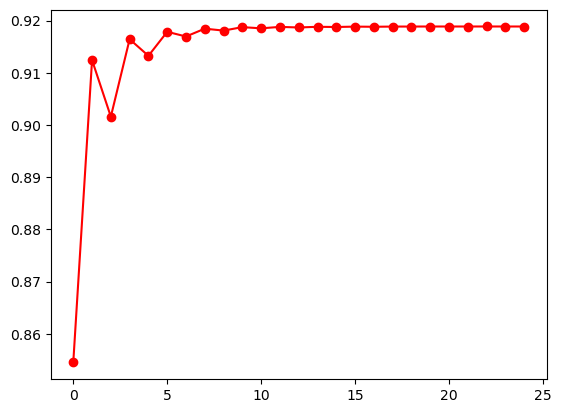

In [13]:
score_validation
plt.plot(score_validation, marker = 'o', color = 'r')

Nous constatons une très forte stagnation entre 7 et 20 pour le k. Nous allons tester notre modèle avec une optimisation entre 8 et 10 (qui semble présenter une légère hausse).

In [15]:
grid_param = {'n_neighbors':np.arange(8,10),
             'weights' : ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(KNeighborsClassifier(), grid_param, cv = 5, verbose = 5)

In [16]:
# ici, on entraine la fonction
grid.fit(X_train, y_train)

# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.919 total time= 1.1min
[CV 2/5] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.919 total time= 1.1min
[CV 3/5] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.918 total time= 1.1min
[CV 4/5] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.918 total time= 1.1min
[CV 5/5] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.919 total time= 1.3min
[CV 1/5] END metric=euclidean, n_neighbors=8, weights=distance;, score=0.917 total time= 1.1min
[CV 2/5] END metric=euclidean, n_neighbors=8, weights=distance;, score=0.917 total time= 1.2min
[CV 3/5] END metric=euclidean, n_neighbors=8, weights=distance;, score=0.917 total time= 1.1min
[CV 4/5] END metric=euclidean, n_neighbors=8, weights=distance;, score=0.917 total time= 1.1min
[CV 5/5] END metric=euclidean, n_neighbors=8, weights=distance;, score=0.917 tot

In [18]:
# Création du modèle final avec les hyperparamètres
model_final = KNeighborsClassifier(metric='euclidean', n_neighbors=8, weights='uniform')
model_final.fit(X_train, y_train)

# Évaluation du modèle
print('Le taux de prédiction du modèle est de : ', model_final.score(X_train, y_train))

Le taux de prédiction du modèle est de :  0.9191385298466368


In [19]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model_final.predict(X_test))

array([[70712,    50],
       [ 6106,     9]], dtype=int64)

In [ ]:
import pickle

# Sauvegarde du modèle
with open('model_KNN.pkl', 'wb') as file:
    pickle.dump(model, file)